**Import**

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

## **Load Dataset**

Extract Dataset

In [426]:
Zip_file_path = '../Data/archive.zip'
data_path = '../Data'
with ZipFile(Zip_file_path) as file:
    file.extractall(path=data_path)
data_path += "/" + file.namelist()[0]
data_path

'../Data/Energy_consumption.csv'

In [427]:
ec = pd.read_csv(data_path)
ec.head(3)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888


## **EDA**

In [428]:
ec.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [429]:
ec.shape

(1000, 11)

Observation: 1000 rows and 11 columns

In [430]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [431]:
ec.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


Check for null values 

In [432]:
ec.isna().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

Observation: No null values present

Checking for distribution of the data

In [433]:
def numerical_distribution(x):
    plt.title(f"Histogram for {x.name}")
    plt.xlabel(x.name)
    plt.ylabel("Frequency")
    sns.histplot(x)
    plt.show()
    print("More Informations")
    print(f"Skewness of the data: {x.skew()}")
    print(f"Kurtosis of the data: {x.kurt()}")
    print(f"Mininmum value is {x.min()}")
    print(f"Maximum value is {x.max()}")
    print(f"Mean is {x.mean()}")
    print(f"Median value is {x.median()}")
    print(f"Mode is {x.mode()[0]}")

In [434]:
numerical_data = ec.select_dtypes('number')
numerical_cols = numerical_data.columns

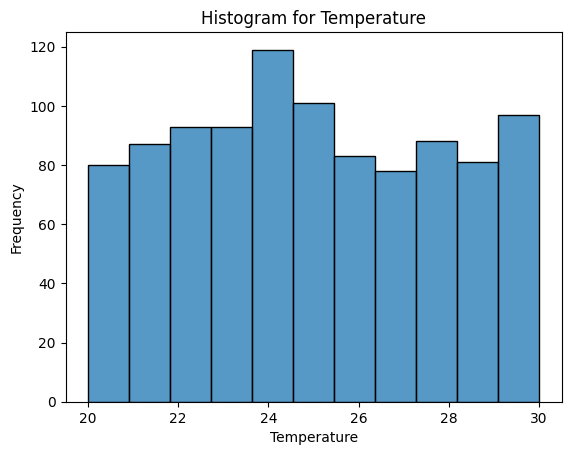

More Informations
Skewness of the data: 0.0884278609675873
Kurtosis of the data: -1.1151956012557656
Mininmum value is 20.00756508361767
Maximum value is 29.998670840983927
Mean is 24.982026291058794
Median value is 24.751636889884217
Mode is 20.00756508361767


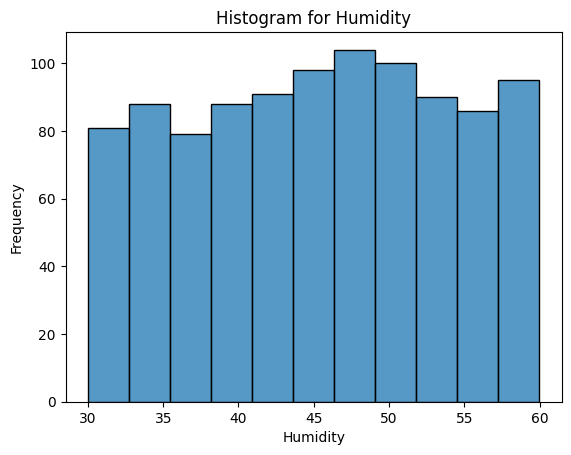

More Informations
Skewness of the data: -0.06646328982692608
Kurtosis of the data: -1.1337482000091965
Mininmum value is 30.01597450346074
Maximum value is 59.96908490414602
Mean is 45.39541178594965
Median value is 45.97211619015158
Mode is 30.01597450346074


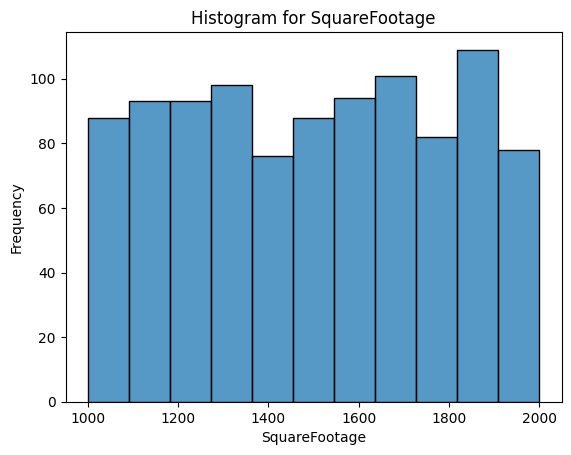

More Informations
Skewness of the data: -0.01944085822160761
Kurtosis of the data: -1.229895032171544
Mininmum value is 1000.5126606747408
Maximum value is 1999.982252131635
Mean is 1500.0524884883348
Median value is 1507.967426257272
Mode is 1000.5126606747408


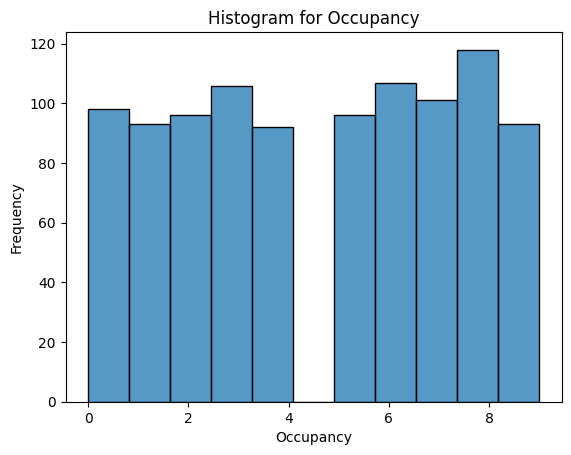

More Informations
Skewness of the data: -0.05522916402504866
Kurtosis of the data: -1.233841588954689
Mininmum value is 0
Maximum value is 9
Mean is 4.581
Median value is 5.0
Mode is 8


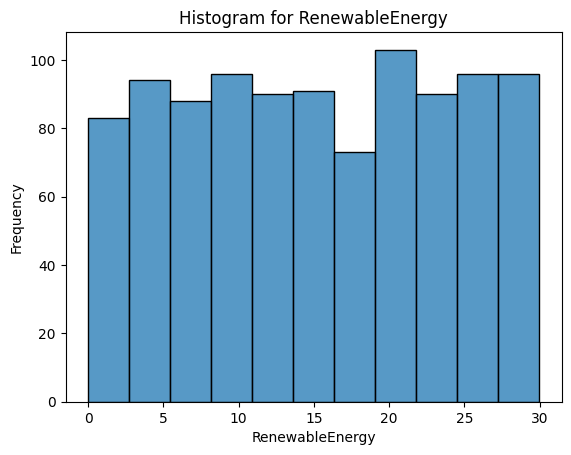

More Informations
Skewness of the data: -0.021596899268390923
Kurtosis of the data: -1.220440388693998
Mininmum value is 0.0066421051905973
Maximum value is 29.96532733777335
Mean is 15.13281274796256
Median value is 15.072295633046846
Mode is 0.0066421051905973


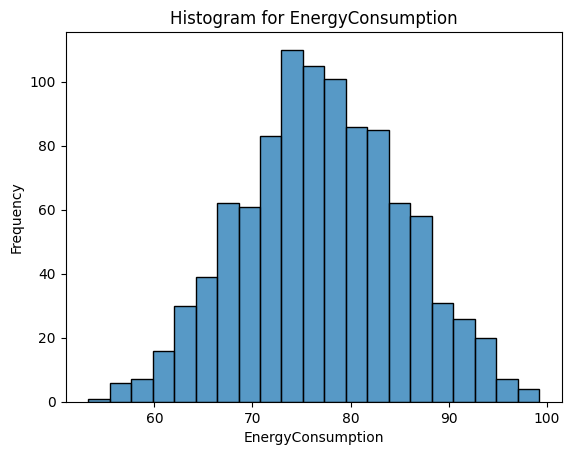

More Informations
Skewness of the data: 0.027398907453860765
Kurtosis of the data: -0.30015404678096447
Mininmum value is 53.26327834004948
Maximum value is 99.20111959032307
Mean is 77.05587286869279
Median value is 76.943696472395
Mode is 53.26327834004948


In [435]:

for col in numerical_cols:
    numerical_distribution(numerical_data[col])

Oservation: Humidity, temperature and square footage follow a Uniform distribution. Occupancy and renewable energy follow bi modal distribution Energy consumption follow guassian distribution

we need to handle bimodal distribution like Occupancy and Renewable energy

**Categorical Distribution**

In [436]:
def categorical_distribution(x):
    values = x.value_counts()
    plt.title(f"Bar plot for {x.name}")
    plt.xlabel(x.name)
    plt.ylabel("Count")
    sns.barplot(x=values.index,y=values.values)
    plt.show()
    print(f"Value count is {values}")

In [437]:
categorical_data = ec.select_dtypes('object')
categorical_cols = categorical_data.columns

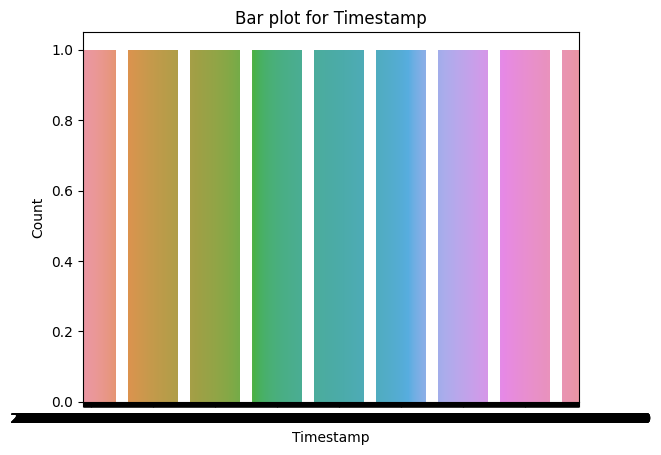

Value count is Timestamp
2022-01-01 00:00:00    1
2022-01-28 23:00:00    1
2022-01-28 10:00:00    1
2022-01-28 11:00:00    1
2022-01-28 12:00:00    1
                      ..
2022-01-15 02:00:00    1
2022-01-15 03:00:00    1
2022-01-15 04:00:00    1
2022-01-15 05:00:00    1
2022-02-11 15:00:00    1
Name: count, Length: 1000, dtype: int64


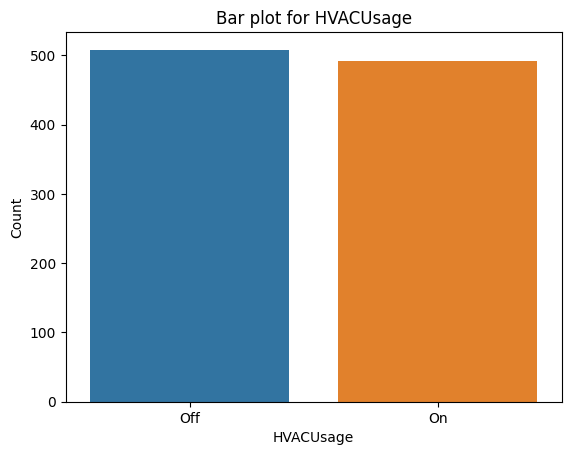

Value count is HVACUsage
Off    508
On     492
Name: count, dtype: int64


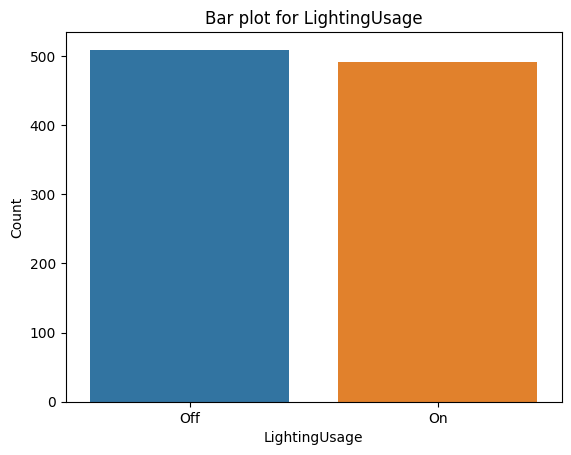

Value count is LightingUsage
Off    509
On     491
Name: count, dtype: int64


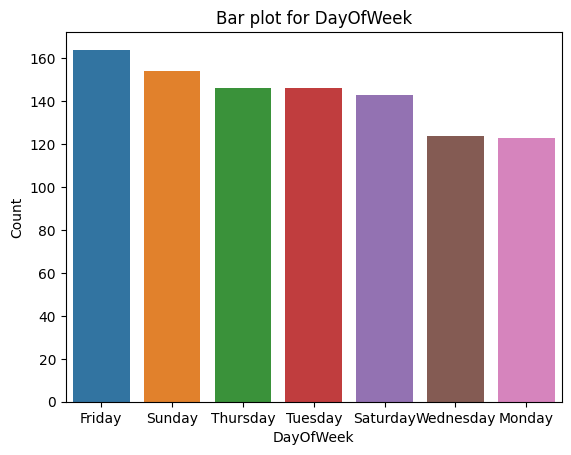

Value count is DayOfWeek
Friday       164
Sunday       154
Thursday     146
Tuesday      146
Saturday     143
Wednesday    124
Monday       123
Name: count, dtype: int64


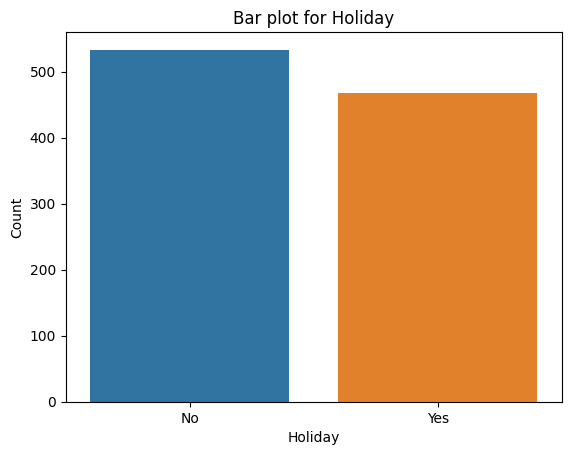

Value count is Holiday
No     533
Yes    467
Name: count, dtype: int64


In [438]:
for col in categorical_cols:
    categorical_distribution(categorical_data[col])

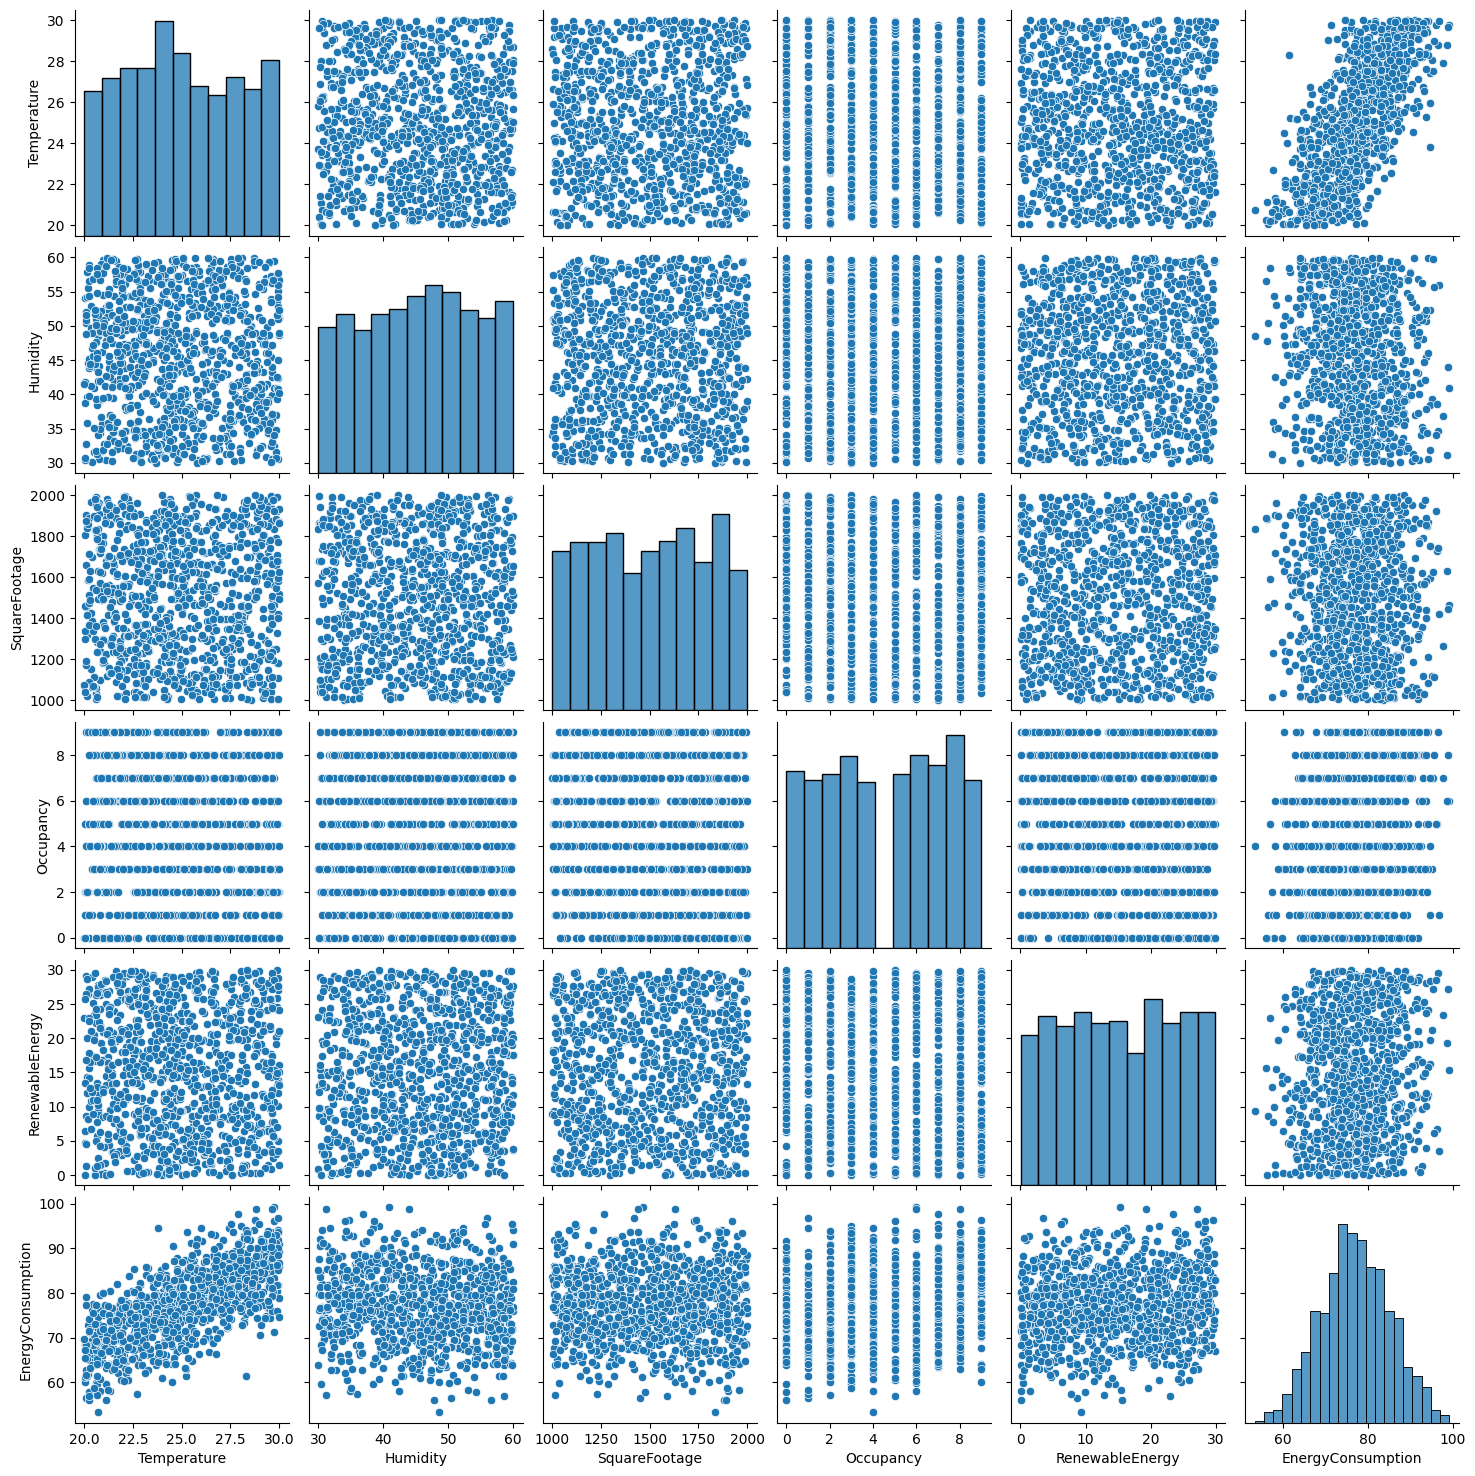

In [439]:
sns.pairplot(ec)

In [440]:
corr_data = ec.select_dtypes('number')

In [441]:
corr_data.corr()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
Temperature,1.000000,-0.034032,0.004551,-0.003490,-0.001350,0.696410
Humidity,-0.034032,1.000000,-0.014651,0.004766,0.002052,-0.093583
SquareFootage,0.004551,-0.014651,1.000000,0.009696,0.022196,-0.001129
Occupancy,-0.003490,0.004766,0.009696,1.000000,0.013680,0.186580
RenewableEnergy,-0.001350,0.002052,0.022196,0.013680,1.000000,0.081160
EnergyConsumption,0.696410,-0.093583,-0.001129,0.186580,0.081160,1.000000


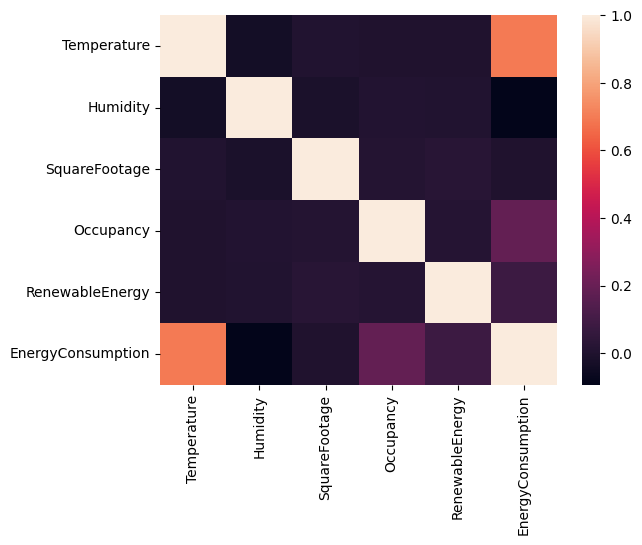

In [442]:
sns.heatmap(corr_data.corr())
plt.show()

Outliers Detection

In [443]:
def outliers_detection(x):
    plt.title(f"Box Plot for {x.name}")
    sns.boxplot(x)
    plt.show()

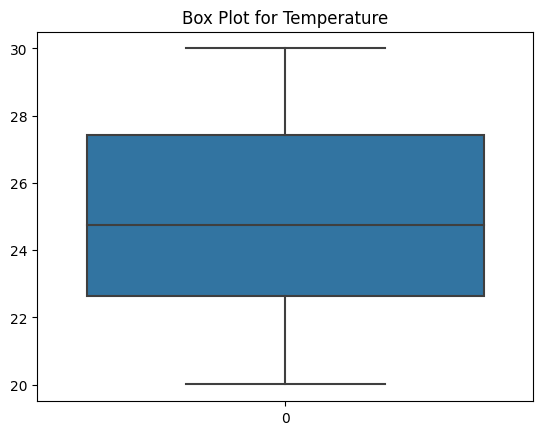

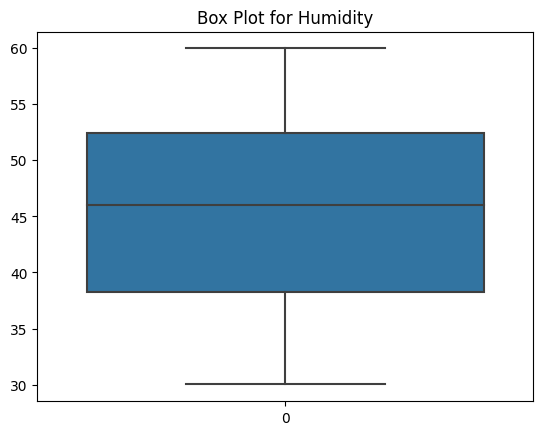

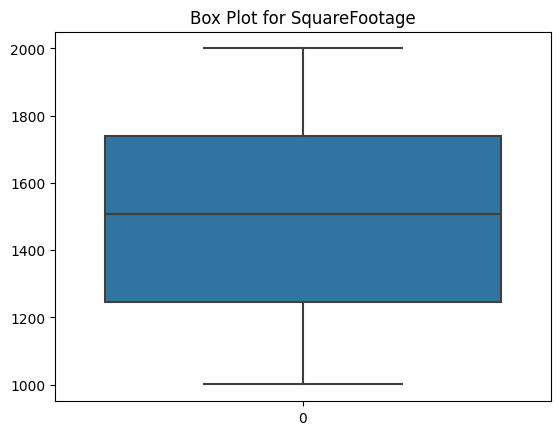

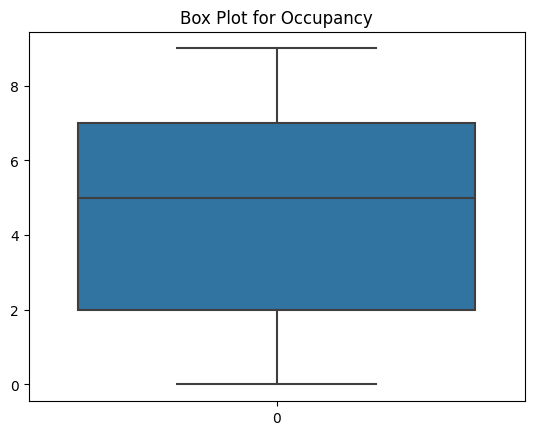

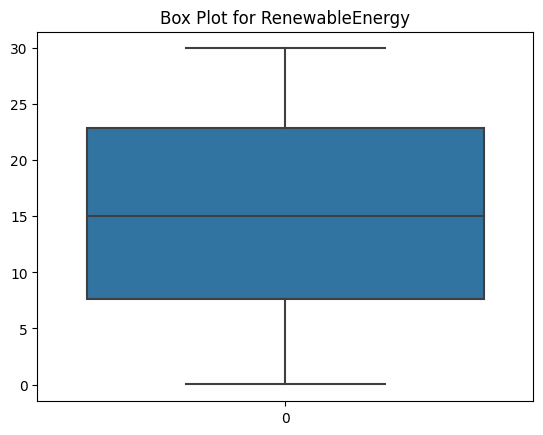

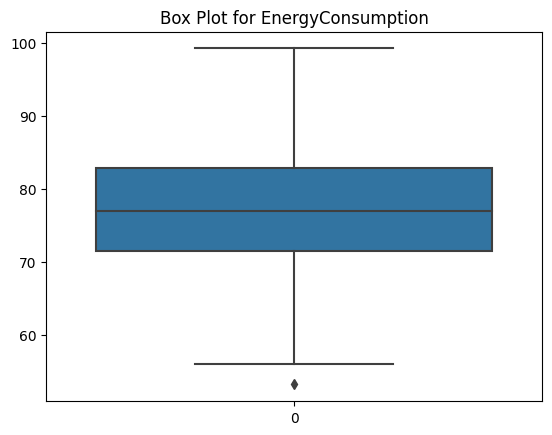

In [444]:
for col in numerical_cols:
    outliers_detection(numerical_data[col])

One outlier is detected in EnergyConsumption

In [445]:
ec['EnergyConsumption'].describe()

count    1000.000000
mean       77.055873
std         8.144112
min        53.263278
25%        71.544690
50%        76.943696
75%        82.921742
max        99.201120
Name: EnergyConsumption, dtype: float64

In [446]:
energy_consumption = ec['EnergyConsumption']

In [447]:
q1 = energy_consumption.quantile(.25)
q3 = energy_consumption.quantile(.75)
iqr = q3 - q1
lower_value = q1 - 1.5 * iqr
upper_value = q3 + 1.5 * iqr
lower_value,upper_value

(54.47911277617991, 99.98731964403399)

In [448]:
for value in energy_consumption:
    if value < lower_value or value > upper_value:
        outlier = value

In [449]:
print(outlier)

53.26327834004948


This outlier does not seem as a problem, because it deviate very less from lower value

## **Preprocess Data**

1. Encode categorical data
2. Handle Bimodal distribution
3. Scale data

Encode categorical data

In [450]:
ec.head(3)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888


One Hot encode all the data

In [451]:
def one_hot(x):
    onehot_encoder = OneHotEncoder(sparse_output=False)
    values = onehot_encoder.fit_transform(ec[[x]])
    return pd.DataFrame(values,columns=onehot_encoder.get_feature_names_out([x]))

In [452]:
binary_cols = ['HVACUsage', 'LightingUsage', 'Holiday', 'DayOfWeek']
encoded_df = pd.DataFrame()
encoded_list = []
for col in binary_cols:
    try:
        encoded_list.append(one_hot(col))
        ec.drop(col, axis=1, inplace=True)
    except KeyError as e:
        print(f"Key is not exist in the dataframe! Try to run all. {e}")

In [453]:
encoded_df = pd.concat(encoded_list,axis=1)
encoded_df.head(3)

,HVACUsage_Off,HVACUsage_On,LightingUsage_Off,LightingUsage_On,Holiday_No,Holiday_Yes,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [454]:
ec = pd.concat([ec,encoded_df],axis=1)
ec.head(2)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,HVACUsage_Off,HVACUsage_On,LightingUsage_Off,LightingUsage_On,Holiday_No,Holiday_Yes,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,2.774699,75.364373,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,21.831384,83.401855,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Handle bimodal values(Occupancy and Renewable data)